In [8]:
import torch
import torch.nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# torchvision에 정의되어있는 FashionMNIST 데이터셋을 불러옵니다.

In [9]:
train_data = datasets.FashionMNIST(
    root = 'data',
    download=True,
    train =True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    download= True,
    train = False,
    transform=ToTensor()
)

## 데이터셋 확인해보기

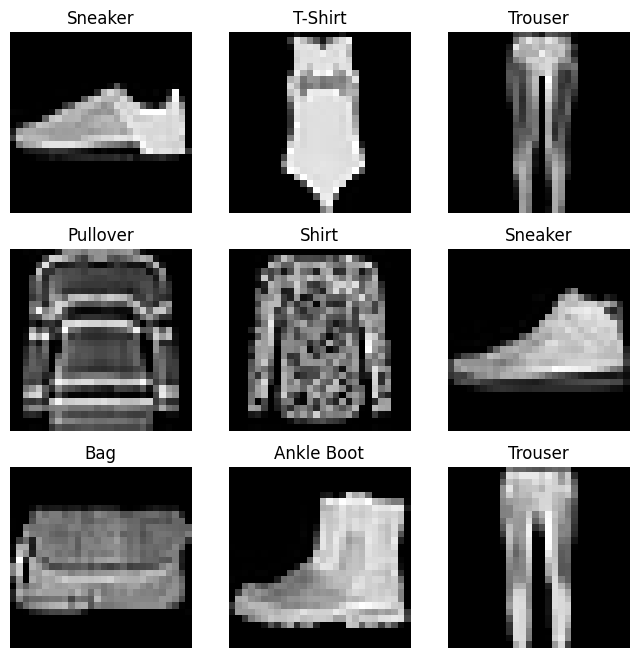

In [10]:
class_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    # torch.randint(low, high, size) 즉, train_data의 인덱스 내에서 무작위 숫자를 1차원 tensor로 뽑고 이를 다시 single-element로 변경한다
    sample_idx = torch.randint(0, len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(class_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


## 사용자 정의 Custom Dataset만들기
> 반드시 __init__,  __len__,  __getitm__ 을 구현해야합니다.

In [ ]:
import os 
import pandas as pd 

# 이미지 파일을 텐서형태로 읽어오는 라이브러리
from torchvision.io import read_image


class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, image_dir, transform = None, target_transform = None):
        # annotation 파일을 가지고 와서 경로와 라벨 정보를 pandas로 읽어옵니다.
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = image_dir
        self.transform = transform
        self.target_trasform = target_transform


    def __len__(self):
        return len(self.img_labels)
    

    def __getitem__(self , idx):
        # 이미지 경로 + 파일 경로를 합쳐서 idx의 이미지 경로를 반환합니다. [0]이 file_name, [1]이 label이다
        img_path = os.path(self.img_dir, self.img_labels.iloc[idx, 0])
        # 이미지를 tensor로 읽어온다
        image = read_image(img_path)
        # 라벨을 읽어온다
        label = self.img_labels.iloc[idx, 1]

        # transform : 이미지 자체를 rotation, flip등 
        # target_transfom : label을 변환 : one-hot-encoding 등 
        if self.transform:
            image = self.transform(image)
        if self.target_trasform :
            label = self.target_trasform(label)
        
        return image, label



# DataLoader 정의하기

In [11]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle= True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


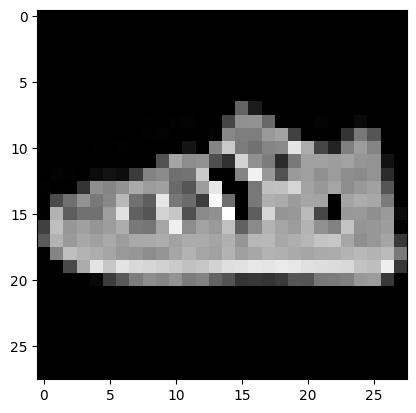

Label: 5


In [21]:
# 이미지와 정답(label)을 표시합니다.
# next(iter())의 경우 ()안의 값이 tupe, list  등인 경우 순서대로 element를 가져오게 됩니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")